In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# Load the California Housing Data from sklearn's datasets.
housing = datasets.fetch_california_housing()

# Turn the dataset into a DataFrame for easier manipulation.
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data["MedHouseVal"] = housing.target

# Explore the dataset and look at the first few rows of the DataFrame to understand the data.
print(data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
# Identify the feature variable(s) and target variable.
# In this case, we choose "AveRooms" (average number of rooms per dwelling) as feature and "MedHouseVal" as target.
X = pd.DataFrame(np.c_[data["AveRooms"]], columns=["AveRooms"])
Y = data["MedHouseVal"]

# Split our data into training and testing subsets.
X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, test_size=0.2, random_state=9
)

# Define, fit, and run our linear regression model using train data.
model = LinearRegression()
model.fit(X_train, Y_train)

# Evaluate the model using the test data.
Y_pred = model.predict(X_test)

# Create metrics (like Mean Squared Error) to assess our model's performance.
mse = metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1.340961179318387


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

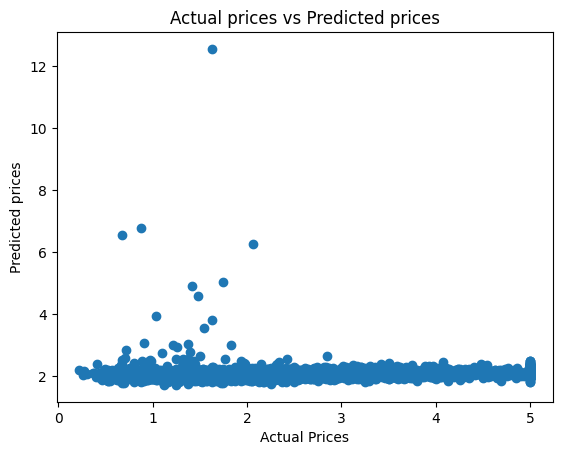

In [5]:
# We can use Matplotlib to create scatter plot of actual prices vs predicted prices.
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")